# Programa 3
- Silva Velázquez Elsy Camila
- Longines Tapia Hugo Didier
- Andrés Urbano Guillermo Gerardo

In [ ]:
import numpy as np

# Implementar el cálculo de la matriz de covarianzas

In [ ]:
def esperanza(vectores,n ,m):
    """
    Calcula la esperanza.

    Solo se pueden meter vectores de la misma dimension.
    El numero de vectores m no puede ser negativo
    La dimension no puede ser negativa
    
    Arguments:
    n - dimension del vector
    m - numero de vectores
    """    
    if n > 1:
        mu = [0] * n
        print(vectores)
        for i, vector in enumerate(vectores):
            print(vector)
            for j, renglon in enumerate(vector):            
                mu[i] += renglon
        return np.array(mu) / m
    elif n == 0 or m == 0:
        return 0
    else:
        suma = 0
        for vect in vectores:
            suma += vect
        return suma/m

def des(Xn):
    """ Desconpone sus columnas de una matriz a vectores

    Arguments:
    Xn -- matriz a descomponer
    """
    result = []
    for n in range(Xn.shape[1]):
        result.append(Xn[:,n])
    return result    

def cov(Xn, Yn):
    """Genera la covarianza de dos vectores
    
    Arguments:
    Xn -- es un vector 
    Yn -- es un vector
    """
    suma = 0
    for xi, yi in zip(Xn, Yn):
        suma += ((xi - esperanza(Xn,1, len(Xn))) * (yi - esperanza(Yn, 1, len(Yn))))
    return suma/len(Xn)

def matriz_cov(X):    
    """Calcula la matriz de covarianza

    Arguments:
    X - es conjunto de vectores
    """
    Xn = des(X)
    matriz = np.zeros((len(Xn),len(Xn)))
    for i in range(len(Xn)):
        for j in range(len(Xn)):
            matriz[i][j] = cov(Xn[i], Xn[j])
    return matriz

## Ejemplo 

In [ ]:
X = np.array([[1,2], [2,2], [3,1], [2,3], [3,2]])
print(X)
des(X)

[[1 2]
 [2 2]
 [3 1]
 [2 3]
 [3 2]]


[array([1, 2, 3, 2, 3]), array([2, 2, 1, 3, 2])]

In [ ]:
matriz_cov(X)

array([[ 0.56, -0.2 ],
       [-0.2 ,  0.4 ]])

# Algoritmo SBS

In [ ]:
import numpy as np
# La utilizaremos precisamente por la idea
# de ir moviendonos, quitando una columna y a ver  que sucede
# una y cada una de ellas y despues tomar la que nos regrese el
# mejor resultado
from itertools import combinations
from sklearn.base import clone
from sklearn.metrics import accuracy_score
from sklearn.base import clone

In [ ]:
class SBS():
    def __init__(self, estimador, caracteristica_k):
        """Empieza un estimador con cierto numero de caracteriscas."""
        self.estimador = clone(estimador)
        self.caracteristica_k = caracteristica_k

    # 
    def fit(self, X_train, X_test, y_train, y_test):
        """Funcion de ajuste
        

        Arguments:
        _train -- entrena los datos
        _test -- prueba los datos
        """
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, X_test,
                                 y_train, y_test, self.indices_)
        self.scores_ = [score]
        
        # Itera a traves  de todas las dimensiones hasta alcanzar 
        # la k-esima caracteristica
        while dim > self.caracteristica_k:
            scores = []
            subsets = []
            
            # Itera las diferentes cominaciones de caracteristicas
            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, X_test, y_train, y_test, p)
                scores.append(score)
                subsets.append(p)

            best_score_index = np.argmax(scores)

            self.scores_.append(scores[best_score_index])            
            self.indices_ = subsets[best_score_index]            
            self.subsets_.append(self.indices_)
            dim -= 1             

    # Funcion para transformar
    def transform(self, X):
        """Transforma los datos obteniendo el mejor score"""
        return X.values[:, self.indices_]
        pass
    

    # Una funcion que nos diga que tan bien o mal se comporta nuestro algortimo
    # comparado con la iteracion anterior
    def _calc_score(self, X_train, X_test, y_train, y_test, indices):
        """ Entrena el modelo con un conjunto de caracteristicas. """
        self.estimador.fit(X_train[:, indices], y_train.ravel())
        y_pred = self.estimador.predict(X_test[:, indices])
        score = accuracy_score(y_test, y_pred)
        return score 

In [ ]:
# Ejemplo con mi implementación de SBS:
# Datos
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
                      header=None)
df_wine.columns = ['Class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium',
                   'Total phenols','Flavonoids','Nonflavonoids phenols','Proanthocyanins',
                   'Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
df_wine.tail()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavonoids,Nonflavonoids phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [ ]:
# Datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
#print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# estadarizamos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
# prueba de SBS usando KNN
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

#print(y_train)
sbs = SBS(estimador=knn, caracteristica_k=1)
sbs.fit(X_train_std, X_test_std, y_train, y_test)

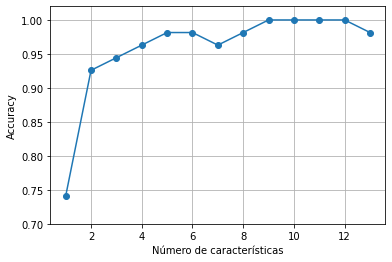

In [ ]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7,1.02])
plt.ylabel('Accuracy')
plt.xlabel('Número de características')
plt.grid()
plt.show()